In [1]:
import os
import sys
from collections import deque

import numpy as np
import matplotlib.pyplot as plt

import gym
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical

# configure module & syspath
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.policies.continuous_policy import ContinuousPolicy
from src.utils import compute_loss
from tqdm import tqdm

In [2]:
env = gym.make('Pendulum-v1')

# sampling from a normal distribution so we need the mean and standard deviation.
num_params_pd = 2

rewards_queue = deque()
rewards_ma = list()

pi = ContinuousPolicy(env.observation_space.shape[0], num_params_pd)
optimizer = optim.Adam(pi.parameters(), lr = 0.001)

max_episodes = 500
max_trajectory_length = 200
discount_factor = 0.99

for epi in tqdm(range(max_episodes)):
    state, _ = env.reset()

    for t in range(max_trajectory_length):
        action = pi.act(torch.from_numpy(state.astype(np.float32)))
        state, reward, done, _, _ = env.step(action)

        pi.rewards.append(reward)
        env.render()

        if done:
            break

    loss = compute_loss(pi, optimizer, discount_factor)
    total_reward = sum(pi.rewards)

    pi.reset()
    
    if len(rewards_queue) > 20:
        rewards_queue.popleft()

    rewards_queue.append(total_reward)
    mean_reward = np.mean(rewards_queue)
    rewards_ma.append(mean_reward)

  0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.9/site-packages/gym/envs/classic_control/pendulum.py:167: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("Pendulum-v1", render_mode="rgb_array")
  gym.logger.warn(
100%|██████████| 500/500 [01:43<00:00,  4.84it/s]


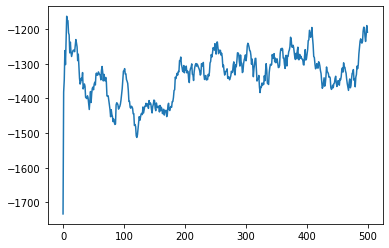

In [4]:
plt.plot(rewards_ma)